In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [3]:
df=pd.read_csv('/content/drive/MyDrive/pollution_test_data1.csv')

In [4]:
def func(s):
    if s == "SE":
        return 1
    elif s == "NE":
        return 2
    elif s == "NW":
        return 3
    else:
        return 4

df["wind_dir"] = df["wnd_dir"].apply(func)
del df["wnd_dir"]

In [5]:
df

,pollution,dew,temp,press,wnd_spd,snow,rain,wind_dir
0,128,-16,4,1027,3.58,0,0,1
1,77,-17,5,1027,7.60,0,0,1
2,65,-16,4,1027,9.39,0,0,1
3,79,-16,1,1028,0.89,0,0,4
4,93,-14,0,1028,1.79,0,0,2
...,...,...,...,...,...,...,...,...
341,8,-23,-2,1034,231.97,0,0,3
342,10,-22,-3,1034,237.78,0,0,3
343,10,-22,-3,1034,242.70,0,0,3
344,8,-22,-4,1034,246.72,0,0,3


In [6]:
from sklearn.preprocessing import MinMaxScaler
dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [7]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [8]:
reframed=series_to_supervised(scaled,1,1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.288288,0.523809,0.65,0.666668,0.007102,0.0,0.0,0.000000,0.173423,0.476190,0.70,0.666668,0.016223,0.0,0.0,0.000000
2,0.173423,0.476190,0.70,0.666668,0.016223,0.0,0.0,0.000000,0.146396,0.523809,0.65,0.666668,0.020285,0.0,0.0,0.000000
3,0.146396,0.523809,0.65,0.666668,0.020285,0.0,0.0,0.000000,0.177928,0.523809,0.50,0.708336,0.000998,0.0,0.0,1.000000
4,0.177928,0.523809,0.50,0.708336,0.000998,0.0,0.0,1.000000,0.209459,0.619048,0.45,0.708336,0.003040,0.0,0.0,0.333333
5,0.209459,0.619048,0.45,0.708336,0.003040,0.0,0.0,0.333333,0.234234,0.571429,0.35,0.750000,0.007102,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.022523,0.238095,0.35,0.916668,0.512128,0.0,0.0,0.666667,0.018018,0.190476,0.35,0.958336,0.525310,0.0,0.0,0.666667
342,0.018018,0.190476,0.35,0.958336,0.525310,0.0,0.0,0.666667,0.022523,0.238095,0.30,0.958336,0.538493,0.0,0.0,0.666667
343,0.022523,0.238095,0.30,0.958336,0.538493,0.0,0.0,0.666667,0.022523,0.238095,0.30,0.958336,0.549656,0.0,0.0,0.666667
344,0.022523,0.238095,0.30,0.958336,0.549656,0.0,0.0,0.666667,0.018018,0.238095,0.25,0.958336,0.558778,0.0,0.0,0.666667


In [9]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]],axis=1,inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.288288,0.523809,0.65,0.666668,0.007102,0.0,0.0,0.000000,0.173423
2,0.173423,0.476190,0.70,0.666668,0.016223,0.0,0.0,0.000000,0.146396
3,0.146396,0.523809,0.65,0.666668,0.020285,0.0,0.0,0.000000,0.177928
4,0.177928,0.523809,0.50,0.708336,0.000998,0.0,0.0,1.000000,0.209459
5,0.209459,0.619048,0.45,0.708336,0.003040,0.0,0.0,0.333333,0.234234


In [10]:
values_test=reframed.values
test_x,test_y=values_test[:,:-1],values_test[:,-1]
test_x=test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

In [11]:
test_x.shape,test_y.shape

((345, 1, 8), (345,))

In [12]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/AirPollutionModel.h5')

In [13]:
result=model.predict(test_x)
result=result.ravel()

In [14]:
poll=np.array(df['pollution'])
mean_op=poll.mean()
std_op=poll.std()
print(mean_op,std_op)

96.39884393063583 98.15637163965053


In [15]:
test_y=test_y*std_op + mean_op
result=result*std_op + mean_op

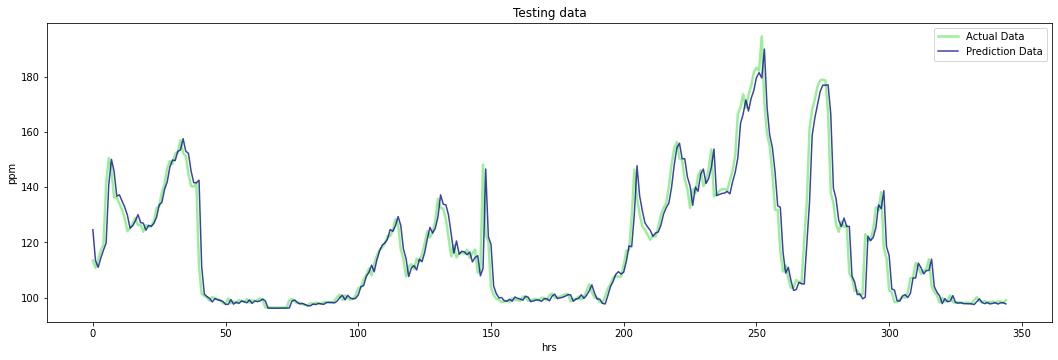

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,5.5))
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(test_y, c = "lightgreen", alpha = 0.9,label="Actual Data",linewidth=2.5,)
plt.plot(result, c = "darkblue", alpha = 0.75,label='Prediction Data')
plt.legend()
plt.title("Testing data")
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(test_y, result))
mae = mean_absolute_error(test_y, result)
print("Test RMSE ="  ,rmse)
print("Test MAE ="  ,mae)

Test RMSE = 6.0829797
Test MAE = 3.3921766
